In [1]:
using PyCall
using Plots
using StatsPlots
using DataFrames
using Colors, ColorSchemes

In [2]:
const np = pyimport("numpy")
const os = pyimport("os")

PyObject <module 'os' from '/home/python/anaconda3-2020.11/lib/python3.8/os.py'>

In [3]:
dir = "/home/shunosuga/data/sotsuron/mean_pc_sub"

caffe_conv1 = np.load(os.path.join(dir, "caffenet", "conv1", "profile_correlation.npy"))
caffe_conv2 = np.load(os.path.join(dir, "caffenet", "conv2", "profile_correlation.npy"))
caffe_conv3 = np.load(os.path.join(dir, "caffenet", "conv3", "profile_correlation.npy"))
caffe_conv4 = np.load(os.path.join(dir, "caffenet", "conv4", "profile_correlation.npy"))
caffe_conv5 = np.load(os.path.join(dir, "caffenet", "conv5", "profile_correlation.npy"))
caffe_fc6 = np.load(os.path.join(dir, "caffenet", "fc6", "profile_correlation.npy"))
caffe_fc7 = np.load(os.path.join(dir, "caffenet", "fc7", "profile_correlation.npy"))
caffe_fc8 = np.load(os.path.join(dir, "caffenet", "fc8", "profile_correlation.npy"))

unet_conv1 = np.load(os.path.join(dir, "unet", "conv1", "profile_correlation.npy"))
unet_conv2 = np.load(os.path.join(dir, "unet", "conv2", "profile_correlation.npy"))
unet_conv3 = np.load(os.path.join(dir, "unet", "conv3", "profile_correlation.npy"))
unet_conv4 = np.load(os.path.join(dir, "unet", "conv4", "profile_correlation.npy"))
unet_conv5 = np.load(os.path.join(dir, "unet", "conv5", "profile_correlation.npy"))
unet_fc6 = np.load(os.path.join(dir, "unet", "fc6", "profile_correlation.npy"))
unet_fc7 = np.load(os.path.join(dir, "unet", "fc7", "profile_correlation.npy"))
unet_fc8 = np.load(os.path.join(dir, "unet", "fc8", "profile_correlation.npy"))

1×1000 Array{Float32,2}:
 0.616041  0.595455  0.59764  0.604541  …  0.617521  0.607773  0.582764

In [4]:
data_caffe = [
    vec(caffe_conv1) ["conv1" for n = 1:length(vec(caffe_conv1))];
    vec(caffe_conv2) ["conv2" for n = 1:length(vec(caffe_conv2))];
    vec(caffe_conv3) ["conv3" for n = 1:length(vec(caffe_conv3))];
    vec(caffe_conv4) ["conv4" for n = 1:length(vec(caffe_conv4))];
    vec(caffe_conv5) ["conv5" for n = 1:length(vec(caffe_conv5))];
    vec(caffe_fc6) ["fc6" for n = 1:length(vec(caffe_fc6))];
    vec(caffe_fc7) ["fc7" for n = 1:length(vec(caffe_fc7))];
    vec(caffe_fc8) ["fc8" for n = 1:length(vec(caffe_fc8))]
]

659272×2 Array{Any,2}:
 -0.0820232  "conv1"
 -0.0435023  "conv1"
  0.0901839  "conv1"
 -0.262417   "conv1"
 -0.0865126  "conv1"
  0.0277009  "conv1"
  0.0184816  "conv1"
  0.186159   "conv1"
  0.085945   "conv1"
 -0.0522408  "conv1"
  0.310903   "conv1"
 -0.0307227  "conv1"
 -0.0166134  "conv1"
  ⋮          
  0.646346   "fc8"
  0.622173   "fc8"
  0.690536   "fc8"
  0.718999   "fc8"
  0.501378   "fc8"
  0.595177   "fc8"
  0.733785   "fc8"
  0.607794   "fc8"
  0.640774   "fc8"
  0.691313   "fc8"
  0.61787    "fc8"
  0.547995   "fc8"

In [5]:
data_unet = [
    vec(unet_conv1) ["conv1" for n = 1:length(vec(unet_conv1))];
    vec(unet_conv2) ["conv2" for n = 1:length(vec(unet_conv2))];
    vec(unet_conv3) ["conv3" for n = 1:length(vec(unet_conv3))];
    vec(unet_conv4) ["conv4" for n = 1:length(vec(unet_conv4))];
    vec(unet_conv5) ["conv5" for n = 1:length(vec(unet_conv5))];
    vec(unet_fc6) ["fc6" for n = 1:length(vec(unet_fc6))];
    vec(unet_fc7) ["fc7" for n = 1:length(vec(unet_fc7))];
    vec(unet_fc8) ["fc8" for n = 1:length(vec(unet_fc8))]
]

659272×2 Array{Any,2}:
  0.0363229  "conv1"
  0.381457   "conv1"
 -0.0462561  "conv1"
 -0.281873   "conv1"
  0.2153     "conv1"
  0.276652   "conv1"
  0.208235   "conv1"
  0.0147205  "conv1"
  0.0755969  "conv1"
  0.430319   "conv1"
  0.312663   "conv1"
  0.346406   "conv1"
  0.364958   "conv1"
  ⋮          
  0.614      "fc8"
  0.595193   "fc8"
  0.62819    "fc8"
  0.595987   "fc8"
  0.605949   "fc8"
  0.584691   "fc8"
  0.607825   "fc8"
  0.519742   "fc8"
  0.610046   "fc8"
  0.617521   "fc8"
  0.607773   "fc8"
  0.582764   "fc8"

In [6]:
df_caffe = DataFrame(data_caffe, [:x, :layer])
df_unet = DataFrame(data_unet, [:x, :layer])

,x,layer
,Any,Any
1,0.0363229,conv1
2,0.381457,conv1
3,-0.0462561,conv1
4,-0.281873,conv1
5,0.2153,conv1
6,0.276652,conv1
7,0.208235,conv1
8,0.0147205,conv1
9,0.0755969,conv1


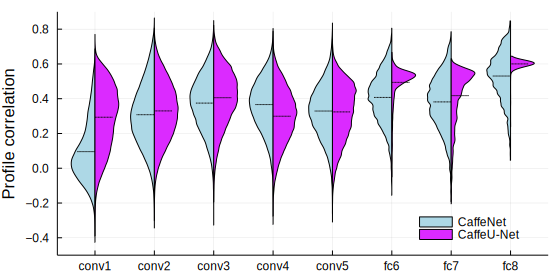

In [7]:
@df df_caffe violin(
    string.(:layer), 
    :x, 
    ylims = (-0.5, 0.9),
    yticks=(
        [-0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8]
    ),
    side=:left, 
    show_mean=true, 
    label="CaffeNet",  
    ylabel="Profile correlation",
    yguidefontsize=11,
    size=(700*0.8, 400*0.7),
    legend= :bottomright,
    linewidth=1.0,
    linestyle=:solid,
    color=palette(:blues),
    fontfamily="helvetica",
    background_color_legend = nothing,
    foreground_color_legend = nothing
    ) 

@df df_unet violin!(
    string.(:layer), 
    :x, 
    side=:right, 
    show_mean=true, 
    label="CaffeU-Net", 
    linewidth=1.0, 
    color=get(colorschemes[:linear_bmw_5_95_c89_n256], 0.57),
    fontfamily="helvetica"
    )

In [8]:
savefig("profile_corr.svg")